# Cirrhosis Data Analysis 
## A Relevel Case Study

Cirrhosis Relevel Data Analysis One of The Relevel's Case Study Which Relevel Asks in Their Relevel Data Analytics Test. Here In this Case Study We are Going To Solve Business Questions You using Python's Data Analysis Kit. 

### What is Relevel ?

Relevel is India's first hiring tournament platform. At Relevel, job aspirants can get access to multiple jobs in dream companies. Relevel also gives companies easy access to source and select the best of candidates, pre-assessed on their aptitude, competencies and skills.

Relevel, an Unacademy Group Company, is India's first hiring platform that empowers job-seekers to showcase their skills through tests and get their dream job within 15 days.

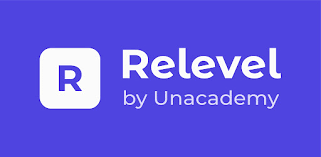

### What is Cirrhosis ?

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism.

Each time your liver is injured — whether by disease, excessive alcohol consumption or another cause — it tries to repair itself. In the process, scar tissue forms. As cirrhosis progresses, more and more scar tissue forms, making it difficult for the liver to function (decompensated cirrhosis). Advanced cirrhosis is life-threatening.

The liver damage done by cirrhosis generally can't be undone. But if liver cirrhosis is diagnosed early and the cause is treated, further damage can be limited and, rarely, reversed.

<img src="https://lirp.cdn-website.com/69c0b277/dms3rep/multi/opt/Liver+Cirrhosis+-+Symptoms%2C+Causes+and+Prevention-1920w.jpg">

### Cirrhosis Dataset
link : `https://raw.githubusercontent.com/mrblink2002/Cirrhosis_DataAnalysis_CaseStudy/master/Dataset/cirrhosis.csv`

Columns|Description
---|---
ID|Represents the ID of the Patient
N_Days|Number of Days Patient Under Treatment
Status|Current Status of the Patient
Drug|Drug Given to Patient
Age|Simply Age of Patient 
Sex|Gender of Patient 
Ascites | Variable To check Whether a Patient Have Ascites Or Not
Hepatomegaly | Variable To check Whether a Patient Have Hepatomegaly Or Not
Spiders | Variable To check Whether a Patient Have Spiders Or Not
Edema | Variable To check Whether a Patient Have Edema Or Not
Bilirubin | Variable To check Whether a Patient Have Bilirubin Or Not
Cholesterol | Cholesterol level of the Patient 
Albumin | Albumin level of the Patient
Copper | Level of Copper in Patient's Body
Alk_Phos| Level of Alkanic Phosphorous
SGOT | Level of SGOT in Patient's Body
Tryglicerides | Level of Tryglicerides in Patient's Body
Platelets | Amount of Platelets in Patient's Body
Prothrombin | Amount of Prothrombin in Patient's Body'
Stage | Stage of Cirrhosis

## Questions Asked

Q1.
<ol type="a">
<li>Calculate the Percentage of Missing Values in Dataset.</li>
<li>Create A DataFrame and Output The Percentage of Missing Value of each field in Descending Order.</li>
<li>Among the Features that have almost same percentage of missing values can you run a correlation
   test on the non missing values of the same features to see if there exists any dependancy between  
    them.</li>
</ol>

Q2.
<ol type="a">
<li>How Does The Ratio Of Male To Female Changes As We go Down the Severity Stage of Crrihosis from stage 
1 to stage 4 ? Comment If You See Any Pattern</li>
<li>Does the Presence of Trigylcerides increases the stage severity of crrihosis ? Run a Statistical 
Test To Prove the Same</li>
</ol>

Q3. 
<ol type="a">
<li>How do the platelet counts vary with age in males and females ?. Demonstrate the Relationship with help of Visualization</li>
<li>With the Help of Visualization Check For the Outliers in the field "Cholesterol" and "Bilirubin". How Can you Deal With this Outliers ?</li>
<li>After Dealing With Outliers, Check For the Relationship between Two Features a & b and what can you infer from that ?</li>
</ol>

Q4.
<ol type="a">
<li>Cholesterol Level Rises With age Test This hypothesis. If you Visualize this relationship Separately for males and
females which genders shows a stepper Curve rise (if their any) ?</li>
<li>How will you test out the combined effect of the features "Ascites" & "Hepatomegaly " on the cirrhois stage</li>
</ol>

Q5.
<ol type="a">
Given A task of Predicting the Stage of Liver Cirrhosis, Select any 5 Features based on The Analysis in the previous
question and build the predictive model
<br>
Hold 20% of Dataset and Use It for Testing the Model
<br>
What is the Accuracy of Predictive Model in terms of Accuracy Score Metrics
</ol>


**Importing the Libraries**

In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns
import plotly.graph_objects as go 
from sklearn.linear_model import LogisticRegression

**Importing the Dataset**

In [102]:
df = pd.read_csv("https://raw.githubusercontent.com/mrblink2002/Cirrhosis_DataAnalysis_CaseStudy/master/Dataset/cirrhosis.csv")
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Exploring the Dataset**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [104]:
df.shape

(418, 20)

In [105]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [106]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

**Answer to Question 1 :**

In [107]:
# a)
round((df.isnull().sum() / df.shape[0]) * 100 , 2)

ID                0.00
N_Days            0.00
Status            0.00
Drug             25.36
Age               0.00
Sex               0.00
Ascites          25.36
Hepatomegaly     25.36
Spiders          25.36
Edema             0.00
Bilirubin         0.00
Cholesterol      32.06
Albumin           0.00
Copper           25.84
Alk_Phos         25.36
SGOT             25.36
Tryglicerides    32.54
Platelets         2.63
Prothrombin       0.48
Stage             1.44
dtype: float64

In [108]:
# b)
miss_percent = round((df.isnull().sum() / df.shape[0]) * 100, 2) 
miss_df = pd.DataFrame({ "Values" : miss_percent}).reset_index()

miss_df.sort_values(by = "Values", ascending = False)

,index,Values
16,Tryglicerides,32.54
11,Cholesterol,32.06
13,Copper,25.84
3,Drug,25.36
6,Ascites,25.36
7,Hepatomegaly,25.36
8,Spiders,25.36
15,SGOT,25.36
14,Alk_Phos,25.36
17,Platelets,2.63


The Variables Copper , SGOT , Alk_Phos are the Variables Which Are Having <br>Almost Same Number of Missing Percentage so we are going to use <br>this fileds to find relationship in between them if there exist any

In [109]:
# c)
#Running the Pearson's Correlation Test on Those Columns
filtered_first = ["Copper","Drug","Ascites","Hepatomegaly","Spiders","SGOT","Alk_Phos"]

df[filtered_first].corr()

,Copper,SGOT,Alk_Phos
Copper,1.000000,0.293829,0.187357
SGOT,0.293829,1.000000,0.112217
Alk_Phos,0.187357,0.112217,1.000000


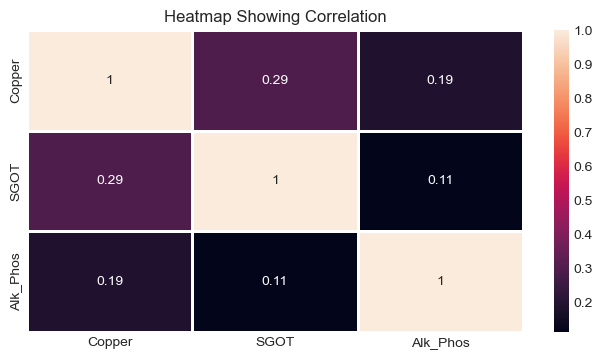

In [110]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize = (8,4), dpi = 100)
sns.heatmap(df[filtered_first].corr(), annot = True, linewidths = 2)
plt.title("Heatmap Showing Correlation")
plt.show()

<strong>From The Graph Their is Not Any Strong Relationship Between <br>The Features Copper, SGOT and Alk Phos which are relatively having same amount of missing values</strong>

Now We are Going To Check For The Columns Tryglicerides and Cholesterol

In [111]:
filtered_second = ["Tryglicerides","Cholesterol"]

df[filtered_second].corr()

,Tryglicerides,Cholesterol
Tryglicerides,1.00000,0.27683
Cholesterol,0.27683,1.00000


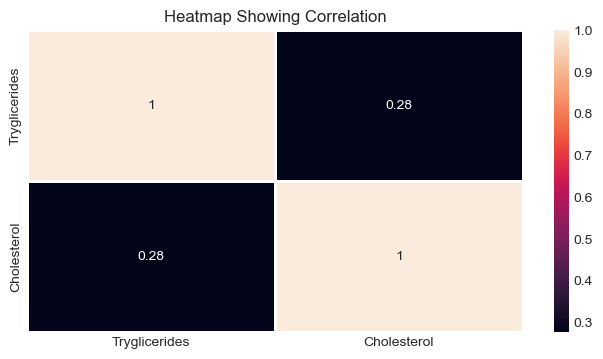

In [112]:
plt.figure(figsize = (8,4), dpi = 100)
sns.heatmap(df[filtered_second].corr(), annot = True, linewidths = 2)
plt.title("Heatmap Showing Correlation")
plt.show()

<strong>From The Graph It is Clear That Their is <br>A Low Positive Correlation Between Tryglicerides and Cholesterol</strong>

In [113]:
df.dropna(how="any",axis=0,inplace=True)

**Answer To Question 2 :**

a)

In [114]:
df['count'] = 1

In [115]:
extracted = pd.pivot_table(data = df , columns = ['Sex'], index = ['Stage'], values = ['count'], aggfunc="count")
filtered = extracted['count']

In [116]:
ans = filtered['M'] / filtered["F"]

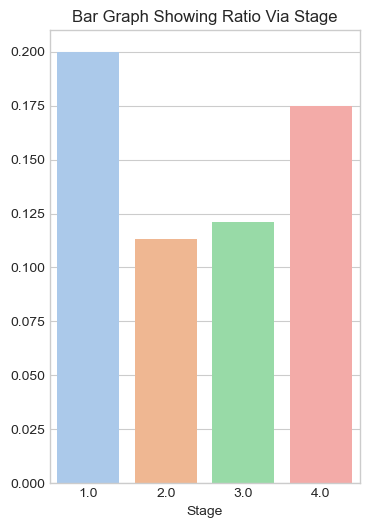

In [117]:
plt.figure(figsize=(4,6),dpi = 100)
sns.barplot(x = ans.index , y = ans, palette = "pastel")
plt.title("Bar Graph Showing Ratio Via Stage")
plt.show()

<strong>According To My Findings :</strong>
<ul>
<li>The Ratio Between Male & Female Remains almost Same At any Stage</li>
<li>For all of the 4 stage Their is Negligible Difference between Ratio and therefore <br> It is Concluded that their is no Pattern</li>
</ul>

b)

In [118]:
#As One of The Variable Is Ordianal Categorical Variable & We have to look for monotonic relationship 
#So It would be best to use Spearman's Rank Correlation Test

from scipy.stats import spearmanr
stat, p = spearmanr(df['Tryglicerides'].fillna(method = 'ffill').to_numpy(),df['Stage'].fillna(method='ffill').to_numpy())
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.106, p=0.080
Probably independent


<strong>Persence of Tryglicerides Doesn't Have Any Impact of Crrihosis Stage Rise</strong>

**Answer to Question 3 :**

a)

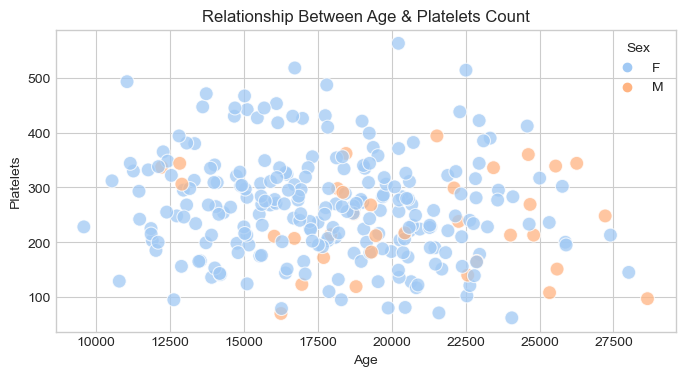

In [119]:
plt.figure(figsize=(8,4), dpi = 100)
sns.scatterplot(data = df , x='Age', y = 'Platelets',hue = "Sex",s=100,alpha=0.75,palette="pastel")
plt.title("Relationship Between Age & Platelets Count")
plt.show()

b)

<AxesSubplot:xlabel='Bilirubin'>

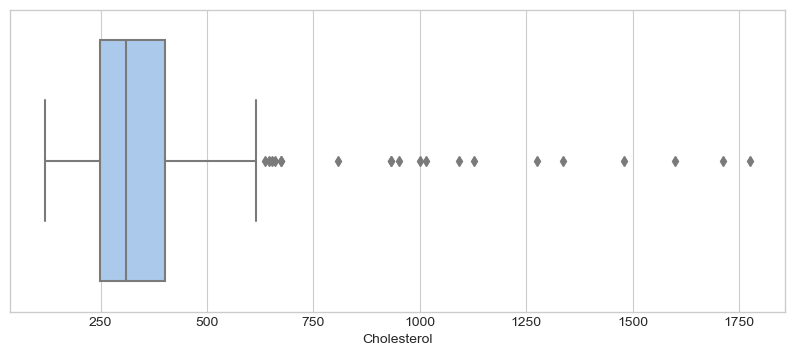

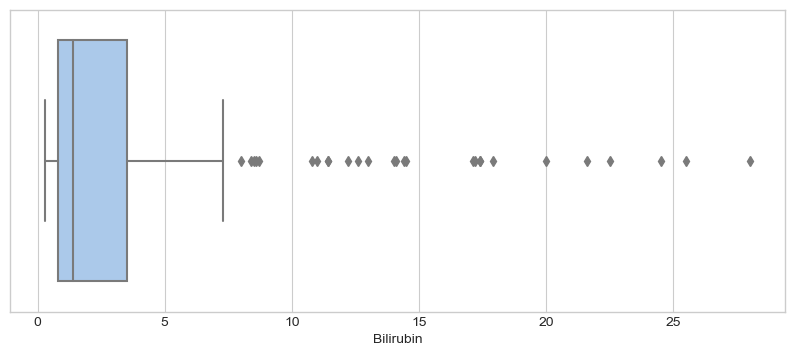

In [120]:
#checking for Outliers in Field "Cholesterol" and "Bilirubin"

plt.figure(figsize = (10,4), dpi = 100)
sns.boxplot(data = df , x = "Cholesterol", palette = "pastel",orient="Vertical")

plt.figure(figsize = (10,4), dpi = 100)
sns.boxplot(data = df , x = "Bilirubin", palette = "pastel",orient="Vertical")

**Above Box Plot Is When Their is Present of Outliers <br>We clearly able to See Outliers are Present**

In [127]:
def winsorize(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, np.where(df[variable] < lower_limit, lower_limit, df[variable]))

upper = df["Bilirubin"].quantile(0.95)
lower = df["Bilirubin"].quantile(0.05)
df["Bilirubin_Removed"] = winsorize(df, "Bilirubin", upper, lower)

In [128]:
upper = df["Cholesterol"].quantile(0.95)
lower = df["Cholesterol"].quantile(0.05)
df["Cholesterol_Removed"] = winsorize(df,"Cholesterol",upper,lower)

In [123]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,count
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,1
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,1
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,1
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1


In [126]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'count'],
      dtype='object')

<AxesSubplot:xlabel='Bilirubin_Removed'>

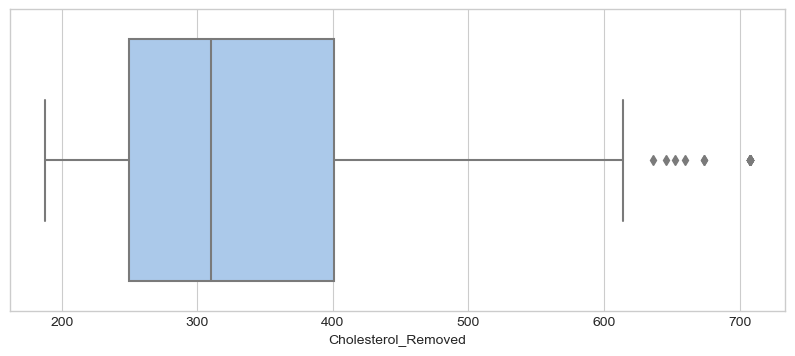

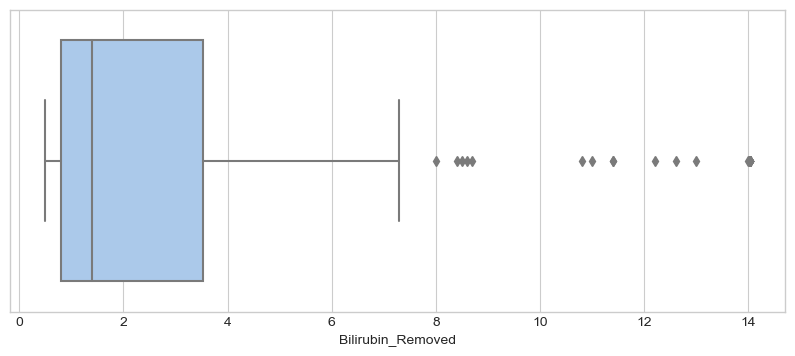

In [129]:
#checking for Outliers in Field "Cholesterol" and "Bilirubin"

plt.figure(figsize = (10,4), dpi = 100)
sns.boxplot(data = df , x = "Cholesterol_Removed", palette = "pastel",orient="Vertical")

plt.figure(figsize = (10,4), dpi = 100)
sns.boxplot(data = df , x = "Bilirubin_Removed", palette = "pastel",orient="Vertical")

In [130]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'count', 'Bilirubin_Removed',
       'Cholesterol_Removed'],
      dtype='object')

c)

In [132]:
relation = df[["Bilirubin_Removed","Cholesterol_Removed"]]
relation.corr()

,Bilirubin_Removed,Cholesterol_Removed
Bilirubin_Removed,1.000000,0.428415
Cholesterol_Removed,0.428415,1.000000


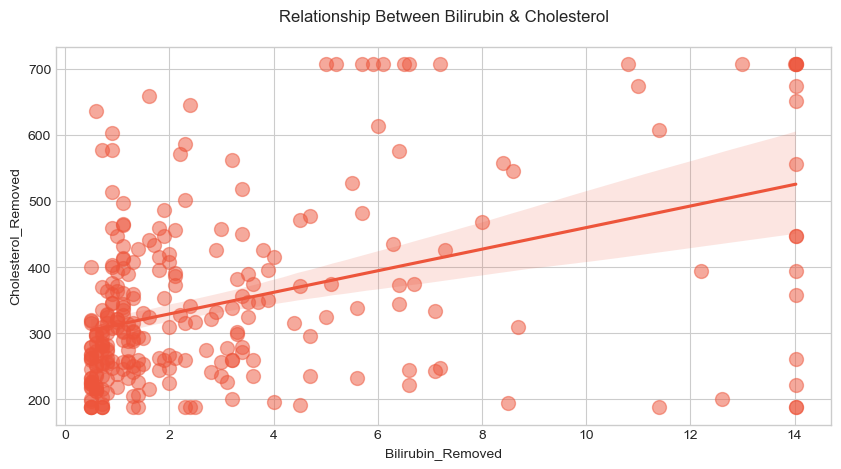

In [152]:
plt.figure(figsize=(10,5), dpi = 100)
sns.regplot(data=relation, x = "Bilirubin_Removed",y = "Cholesterol_Removed", color = "#ed553b",scatter_kws={"s":100,"alpha":0.5})
plt.title("Relationship Between Bilirubin & Cholesterol\n")
plt.show()